<h1><center>Universidad Politecnica Saleciana </center></h1> 

Nombre:Oscar Tenesaca


**Práctica ANN-0:**

Modifique el código anterior, a fin de usar Hot Encoding y contar con 2 salidas en lugar de 1.

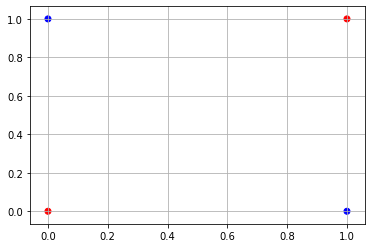

In [1]:
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

x=np.array([[0,0],[0,1],[1,0],[1,1]])
d=np.array([0,1,1,0])

pp.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'red' for i in d])

pp.grid(True)
pp.show()

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/viznet/context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


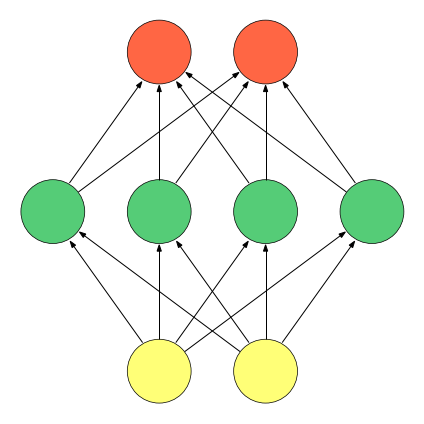

In [6]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 2
neuronas_capa_oculta = 4
neuronas_capa_salida = 2


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()

In [10]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lenc= LabelEncoder()
encoded = lenc.fit_transform(d)
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded=encoded.reshape(len(encoded),1)
dm=enc.fit_transform(encoded)

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(x,dm)

# Mostramos los pesos entre la entrada y la capa oculta
print('Pesos W^(0): \n:',mlp.coefs_[0])

# Mostramos los pesos entre la capa oculta y la capa de salida
print('\nPesos W^(1): \n:',mlp.coefs_[1])

# Probamos si la red devuelve valores apropiados de acuerdo a las entradas (test):
for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)
Pesos W^(0): 
: [[ 4.88245604e+00  4.88385506e+00 -2.19631075e-03 -4.38889889e-03]
 [-4.88438956e+00 -4.88331802e+00 -3.86106900e-03 -5.13798920e-03]]

Pesos W^(1): 
: [[-6.08964788e+00 -6.08630375e+00]
 [ 6.08842710e+00  6.08987785e+00]
 [-9.46275296e-03 -4.55964751e-03]
 [-6.86669766e-03 -5.64984927e-03]]

Prueba con { 0|0 } =>  [[1 0]]

Prueba con { 0|1 } =>  [[0 1]]

Prueba con { 1|0 } =>  [[0 1]]

Prueba con { 1|1 } =>  [[1 0]]


**Práctica ANN-1:**

**Genere 1000 puntos aleatorios con coordenadas $(x_{1}, x_{2})$. Con estos puntos, deberá realizar las siguientes tareas:**

1. Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.
2. Entrenar la red hasta lograr un error mínimo.
3. Probar la red y presentar la matriz de confusión.
4. Indicar el nivel de precisión (muestras correctamente clasificadas frente al total de muestras):

$precision=\frac{muestras ~~correctamente ~~clasificadas}{total~~ de~~ muestras}$


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=False, warm_start=False)
 Matriz de Confusion
 
[[302 106]
 [122 270]]
 
 
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       408
           1       0.72      0.69      0.70       392

    accuracy                           0.71       800
   macro avg       0.72      0.71      0.71       800
weighted avg       0.72      0.71      0.71       800



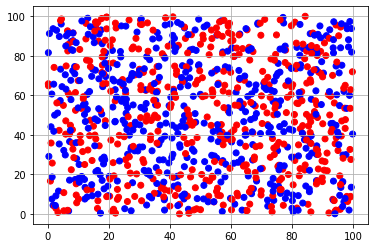

In [2]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.pyplot as pp
import random

n = 1000
coordenadas = []
delta = [1 if i % 2 == 0 else 0 for i in range(0, n)]
#print (delta)
for i in range(0, n):
    coordenadas.append([random.random() * 100, random.random() * 100])
datos = np.array(coordenadas)
x_train, x_test, d_train, d_test = train_test_split(datos, delta, test_size=0.80, random_state = 42 )



#mlp=MLPClassifier(solver = ' lbfgs ' , activation= ' logistic ' , verbose=True, alpha=1e-4,tol=1e-15, hidden_layer_sizes=(150, 2))
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(150, 2))
print(mlp)
mlp.fit( datos, delta )
prediccion = mlp.predict(x_test)
print( ' Matriz de Confusion\n ' ) 
matriz = confusion_matrix(d_test, prediccion)
print(confusion_matrix(d_test, prediccion))
print( ' \n ' )
print(classification_report(d_test, prediccion))

pp.scatter(datos[:,0],datos[:,1],color=['blue' if i==1 else 'red' for i in delta])
pp.grid(True)
pp.show()